In [4]:
import pandas as pd
import datetime as dt
from dateutil import parser

# Load the flights dataset
df_flights = pd.read_csv('flights.csv')
df_flights.head()




/var/folders/2s/c2xnxq8x0nxcy1gb56kh4p6m0000gn/T/ipykernel_6004/2032173432.py:6: DtypeWarning: Columns (3,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df_flights = pd.read_csv('flights.csv')


,FL_DATE,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE
0,2019-03-02,WN,N955WN,4591,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",-8.0,-6.0,0.0,143.0,1025.0,0.97
1,2019-03-02,WN,N8686A,3231,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",1.0,5.0,0.0,135.0,930.0,0.55
2,2019-03-02,WN,N201LV,3383,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",0.0,4.0,0.0,132.0,930.0,0.91
3,2019-03-02,WN,N413WN,5498,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",11.0,14.0,0.0,136.0,930.0,0.67
4,2019-03-02,WN,N7832A,6933,14635,RSW,"Fort Myers, FL",11259,DAL,"Dallas, TX",0.0,-17.0,0.0,151.0,1005.0,0.62


In [5]:
df_flights.tail()

,FL_DATE,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE
1915881,3/23/19,AA,N903NN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-9.0,-6.0,0.0,112,****,0.794884
1915882,3/24/19,AA,N965AN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-2.0,-1.0,0.0,106,****,0.538399
1915883,3/25/19,AA,N979NN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-8.0,-25.0,0.0,106,****,0.955579
1915884,3/26/19,AA,N872NN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-9.0,-6.0,0.0,112,****,0.595344
1915885,3/27/19,AA,N945AN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-8.0,5.0,0.0,117,****,0.350192


In [6]:
df_flights['FL_DATE'].unique()


array(['2019-03-02', '2019-03-03', '2019-03-09', '2019-03-10',
       '2019-03-24', '2019-03-28', '2019-03-29', '2019-03-30',
       '2019-03-20', '2019-03-25', '2019-03-26', '2019-03-31',
       '2019-03-13', '2019-03-14', '2019-03-12', '2019-03-11',
       '2019-03-15', '2019-03-16', '2019-03-17', '2019-03-18',
       '2019-03-19', '2019-03-21', '2019-03-22', '2019-03-23',
       '2019-03-27', '2019-03-01', '2019-03-04', '2019-03-05',
       '2019-03-06', '2019-03-07', '2019-03-08', '2019-02-17',
       '2019-02-18', '2019-02-19', '2019-02-20', '2019-02-21',
       '2019-02-22', '2019-02-23', '2019-02-24', '2019-02-25',
       '2019-02-26', '2019-02-27', '2019-02-28', '2019-02-01',
       '2019-02-02', '2019-02-03', '2019-02-04', '2019-02-05',
       '2019-02-06', '2019-02-07', '2019-02-08', '2019-02-09',
       '2019-02-10', '2019-02-11', '2019-02-12', '2019-02-13',
       '2019-02-14', '2019-02-15', '2019-02-16', '2019-01-21',
       '2019-01-24', '2019-01-25', '2019-01-26', '2019-

In [7]:
# first, make sure everything is a string and drop any leading hyphens
dates = df_flights['FL_DATE'].astype(str).str.lstrip('-')

# now parse flexibly with dateutil
df_flights['FL_DATE'] = dates.apply(lambda x: parser.parse(x, dayfirst=False))

In [8]:
df_flights['FL_DATE'].tail()

1915881   2019-03-23
1915882   2019-03-24
1915883   2019-03-25
1915884   2019-03-26
1915885   2019-03-27
Name: FL_DATE, dtype: datetime64[ns]

In [9]:
df_flights.dtypes

FL_DATE              datetime64[ns]
OP_CARRIER                   object
TAIL_NUM                     object
OP_CARRIER_FL_NUM            object
ORIGIN_AIRPORT_ID             int64
ORIGIN                       object
ORIGIN_CITY_NAME             object
DEST_AIRPORT_ID               int64
DESTINATION                  object
DEST_CITY_NAME               object
DEP_DELAY                   float64
ARR_DELAY                   float64
CANCELLED                   float64
AIR_TIME                     object
DISTANCE                     object
OCCUPANCY_RATE              float64
dtype: object

In [10]:
df_flights['CANCELLED'].dtype
df_flights['CANCELLED'] = df_flights['CANCELLED'].astype('float64')


In [11]:
df_flights = df_flights[df_flights['CANCELLED'] == 0.0]


In [12]:
df_flights.index

Index([      0,       1,       2,       3,       4,       5,       6,       7,
             8,       9,
       ...
       1915876, 1915877, 1915878, 1915879, 1915880, 1915881, 1915882, 1915883,
       1915884, 1915885],
      dtype='int64', length=1864272)

In [13]:
df_flights.head()

,FL_DATE,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE
0,2019-03-02,WN,N955WN,4591,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",-8.0,-6.0,0.0,143.0,1025.0,0.97
1,2019-03-02,WN,N8686A,3231,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",1.0,5.0,0.0,135.0,930.0,0.55
2,2019-03-02,WN,N201LV,3383,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",0.0,4.0,0.0,132.0,930.0,0.91
3,2019-03-02,WN,N413WN,5498,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",11.0,14.0,0.0,136.0,930.0,0.67
4,2019-03-02,WN,N7832A,6933,14635,RSW,"Fort Myers, FL",11259,DAL,"Dallas, TX",0.0,-17.0,0.0,151.0,1005.0,0.62


In [14]:
df_flights['DISTANCE'] = pd.to_numeric(df_flights['DISTANCE'], errors='coerce')
df_flights['AIR_TIME'] = pd.to_numeric(df_flights['AIR_TIME'], errors='coerce')

In [15]:
df_flights[['ARR_DELAY']] = df_flights[['ARR_DELAY']].fillna(0)

df_flights['AIR_TIME'] = df_flights.groupby(['ORIGIN','DESTINATION']
)['AIR_TIME'].transform(lambda x: x.fillna(x.median()))



df_flights['DISTANCE'] = df_flights.groupby(
    ['ORIGIN','DESTINATION']
)['DISTANCE'].transform(lambda x: x.fillna(x.median()))

df_flights['OCCUPANCY_RATE'] = df_flights.groupby('OP_CARRIER')[
    'OCCUPANCY_RATE'
].transform(lambda x: x.fillna(x.mean()))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out

In [18]:
df_flights.isna().sum()

FL_DATE              0
OP_CARRIER           0
TAIL_NUM             0
OP_CARRIER_FL_NUM    0
ORIGIN_AIRPORT_ID    0
ORIGIN               0
ORIGIN_CITY_NAME     0
DEST_AIRPORT_ID      0
DESTINATION          0
DEST_CITY_NAME       0
DEP_DELAY            0
ARR_DELAY            0
CANCELLED            0
AIR_TIME             7
DISTANCE             0
OCCUPANCY_RATE       0
dtype: int64

In [19]:
df_flights.head()

,FL_DATE,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE
0,2019-03-02,WN,N955WN,4591,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",-8.0,-6.0,0.0,143.0,1025.0,0.97
1,2019-03-02,WN,N8686A,3231,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",1.0,5.0,0.0,135.0,930.0,0.55
2,2019-03-02,WN,N201LV,3383,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",0.0,4.0,0.0,132.0,930.0,0.91
3,2019-03-02,WN,N413WN,5498,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",11.0,14.0,0.0,136.0,930.0,0.67
4,2019-03-02,WN,N7832A,6933,14635,RSW,"Fort Myers, FL",11259,DAL,"Dallas, TX",0.0,-17.0,0.0,151.0,1005.0,0.62


In [186]:
df_flights.isna().sum()

FL_DATE              0
OP_CARRIER           0
TAIL_NUM             0
OP_CARRIER_FL_NUM    0
ORIGIN_AIRPORT_ID    0
ORIGIN               0
ORIGIN_CITY_NAME     0
DEST_AIRPORT_ID      0
DESTINATION          0
DEST_CITY_NAME       0
DEP_DELAY            0
ARR_DELAY            0
CANCELLED            0
AIR_TIME             7
DISTANCE             0
OCCUPANCY_RATE       0
dtype: int64

In [20]:
df_flights.dtypes

FL_DATE              datetime64[ns]
OP_CARRIER                   object
TAIL_NUM                     object
OP_CARRIER_FL_NUM            object
ORIGIN_AIRPORT_ID             int64
ORIGIN                       object
ORIGIN_CITY_NAME             object
DEST_AIRPORT_ID               int64
DESTINATION                  object
DEST_CITY_NAME               object
DEP_DELAY                   float64
ARR_DELAY                   float64
CANCELLED                   float64
AIR_TIME                    float64
DISTANCE                    float64
OCCUPANCY_RATE              float64
dtype: object

In [21]:
df_flights.tail()

,FL_DATE,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE
1915881,2019-03-23,AA,N903NN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-9.0,-6.0,0.0,112.0,842.0,0.794884
1915882,2019-03-24,AA,N965AN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-2.0,-1.0,0.0,106.0,842.0,0.538399
1915883,2019-03-25,AA,N979NN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-8.0,-25.0,0.0,106.0,842.0,0.955579
1915884,2019-03-26,AA,N872NN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-9.0,-6.0,0.0,112.0,842.0,0.595344
1915885,2019-03-27,AA,N945AN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-8.0,5.0,0.0,117.0,842.0,0.350192


In [127]:
g
def optimize_df(df: pd.DataFrame,
                date_cols: list[str] = None,
                cat_thresh: float = 0.5) -> pd.DataFrame:
    """
    Optimize a DataFrame’s memory footprint:
      • Downcast float64 → float32, int64 → smallest unsigned int
      • Convert object columns with <cat_thresh unique ratio to categorical
      • Parse specified date columns
      • Print memory use before/after (in MB)
    
    Parameters
    ----------
    df : pd.DataFrame
        The DataFrame to optimize (modified in place).
    date_cols : list[str], optional
        Column names to run pd.to_datetime() on.
    cat_thresh : float, default 0.5
        Maximum unique/value ratio for converting object→category.
    
    Returns
    -------
    pd.DataFrame
        The same DataFrame, optimized in place.
    """
    # baseline
    before = df.memory_usage(deep=True).sum() / 1024**2
    print(f"Memory before: {before:.1f} MB")

    # downcast numerics
    for col in df.select_dtypes("float64"):
        df[col] = pd.to_numeric(df[col], downcast="float")
    for col in df.select_dtypes("int64"):
        df[col] = pd.to_numeric(df[col], downcast="unsigned")

    # convert low‑cardinality objects → category
    for col in df.select_dtypes("object"):
        if df[col].nunique() / len(df) < cat_thresh:
            df[col] = df[col].astype("category")

    # parse dates
    if date_cols:
        for col in date_cols:
            df[col] = pd.to_datetime(df[col], infer_datetime_format=True, errors="ignore")

    # after
    after = df.memory_usage(deep=True).sum() / 1024**2
    print(f"Memory after:  {after:.1f} MB   (↓{before - after:.1f} MB)")

    return df
# optimize df_flights, parsing its FL_DATE column
df_flights = optimize_df(df_flights, date_cols=["FL_DATE"])


NameError: name 'g' is not defined

In [22]:
df_flights.head()

,FL_DATE,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE
0,2019-03-02,WN,N955WN,4591,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",-8.0,-6.0,0.0,143.0,1025.0,0.97
1,2019-03-02,WN,N8686A,3231,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",1.0,5.0,0.0,135.0,930.0,0.55
2,2019-03-02,WN,N201LV,3383,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",0.0,4.0,0.0,132.0,930.0,0.91
3,2019-03-02,WN,N413WN,5498,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",11.0,14.0,0.0,136.0,930.0,0.67
4,2019-03-02,WN,N7832A,6933,14635,RSW,"Fort Myers, FL",11259,DAL,"Dallas, TX",0.0,-17.0,0.0,151.0,1005.0,0.62


In [23]:
df_flights.dtypes

FL_DATE              datetime64[ns]
OP_CARRIER                   object
TAIL_NUM                     object
OP_CARRIER_FL_NUM            object
ORIGIN_AIRPORT_ID             int64
ORIGIN                       object
ORIGIN_CITY_NAME             object
DEST_AIRPORT_ID               int64
DESTINATION                  object
DEST_CITY_NAME               object
DEP_DELAY                   float64
ARR_DELAY                   float64
CANCELLED                   float64
AIR_TIME                    float64
DISTANCE                    float64
OCCUPANCY_RATE              float64
dtype: object

In [24]:
df_flights.duplicated().sum()
df_flights= df_flights.drop_duplicates()

In [25]:
df_flights.index

Index([      0,       1,       2,       3,       4,       5,       6,       7,
             8,       9,
       ...
       1911331, 1911332, 1911333, 1911334, 1911335, 1911336, 1911337, 1911338,
       1911339, 1911340],
      dtype='int64', length=1859862)

In [26]:
df_flights.dtypes

FL_DATE              datetime64[ns]
OP_CARRIER                   object
TAIL_NUM                     object
OP_CARRIER_FL_NUM            object
ORIGIN_AIRPORT_ID             int64
ORIGIN                       object
ORIGIN_CITY_NAME             object
DEST_AIRPORT_ID               int64
DESTINATION                  object
DEST_CITY_NAME               object
DEP_DELAY                   float64
ARR_DELAY                   float64
CANCELLED                   float64
AIR_TIME                    float64
DISTANCE                    float64
OCCUPANCY_RATE              float64
dtype: object

In [27]:
df_flights.index

Index([      0,       1,       2,       3,       4,       5,       6,       7,
             8,       9,
       ...
       1911331, 1911332, 1911333, 1911334, 1911335, 1911336, 1911337, 1911338,
       1911339, 1911340],
      dtype='int64', length=1859862)

In [28]:
import numpy as np
df_flights = df_flights.groupby(
    ['ORIGIN','DESTINATION']).agg(
        {'ORIGIN_CITY_NAME':'first',
         'DEST_CITY_NAME': 'first',
         'DEP_DELAY': np.sum,
         'ARR_DELAY': np.sum,
         'AIR_TIME': np.sum,
         'DISTANCE': np.sum,
         'OCCUPANCY_RATE':np.mean,
         'CANCELLED':'count'}).reset_index()


/var/folders/2s/c2xnxq8x0nxcy1gb56kh4p6m0000gn/T/ipykernel_6004/3847985306.py:3: FutureWarning: The provided callable <function sum at 0x106aca840> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  ['ORIGIN','DESTINATION']).agg(
/var/folders/2s/c2xnxq8x0nxcy1gb56kh4p6m0000gn/T/ipykernel_6004/3847985306.py:3: FutureWarning: The provided callable <function mean at 0x106acb920> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  ['ORIGIN','DESTINATION']).agg(


In [29]:
df_flights.head()

,ORIGIN,DESTINATION,ORIGIN_CITY_NAME,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,AIR_TIME,DISTANCE,OCCUPANCY_RATE,CANCELLED
0,ABE,ATL,"Allentown/Bethlehem/Easton, PA","Atlanta, GA",1298.0,1185.0,23225.0,150164.0,0.641567,217
1,ABE,CLT,"Allentown/Bethlehem/Easton, PA","Charlotte, NC",957.0,1068.0,24842.0,120731.0,0.665976,251
2,ABE,DTW,"Allentown/Bethlehem/Easton, PA","Detroit, MI",3961.0,2651.0,20691.0,105400.0,0.639073,248
3,ABE,FLL,"Allentown/Bethlehem/Easton, PA","Fort Lauderdale, FL",272.0,217.0,2913.0,20820.0,0.580000,20
4,ABE,ORD,"Allentown/Bethlehem/Easton, PA","Chicago, IL",3455.0,2387.0,17637.0,103986.0,0.671195,159


### Codes


In [30]:
df_code = pd.read_csv('Airport_Codes.csv')

In [31]:
df_code.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55369 entries, 0 to 55368
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TYPE          55369 non-null  object 
 1   NAME          55369 non-null  object 
 2   ELEVATION_FT  48354 non-null  float64
 3   CONTINENT     27526 non-null  object 
 4   ISO_COUNTRY   55122 non-null  object 
 5   MUNICIPALITY  49663 non-null  object 
 6   IATA_CODE     9182 non-null   object 
 7   COORDINATES   55369 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.4+ MB


In [32]:
#Filling the null values based on the name. 
def fill_with_group_mode(codes):
    m = codes.mode()
    return codes.fillna(m.iloc[0] if not m.empty else np.nan)

df_code['IATA_CODE'] = (
    df_code
    .groupby('NAME')['IATA_CODE']
    .transform(fill_with_group_mode)
)


In [33]:
# Filtering Medium and Large airports
df_code = df_code[(df_code['TYPE'] == 'medium_airport') | (df_code['TYPE'] == 'large_airport')]

In [34]:
df_code= df_code.drop(['CONTINENT','ISO_COUNTRY','MUNICIPALITY','COORDINATES','ELEVATION_FT'],axis=1)

In [94]:
df_tic = pd.read_csv('tickets.csv')

In [95]:
df_tic.index

RangeIndex(start=0, stop=1167285, step=1)

In [96]:
df_tic = df_tic[df_tic['ROUNDTRIP']== 1]
df_tic.index

Index([      0,       1,       2,       3,      10,      11,      12,      13,
            14,      15,
       ...
       1167264, 1167269, 1167270, 1167273, 1167274, 1167275, 1167277, 1167279,
       1167281, 1167284],
      dtype='int64', length=708600)

In [97]:
#Dropping duplicate tickets
n_dupes = df_tic.duplicated()
n_dupes.sum()
df_tic = df_tic.drop_duplicates()
df_tic.index

Index([      0,       1,       2,       3,      10,      11,      12,      13,
            14,      15,
       ...
       1115040, 1115045, 1115046, 1115047, 1115050, 1115053, 1115057, 1115058,
       1115066, 1115067],
      dtype='int64', length=661036)

In [98]:
df_tic['ITIN_FARE'] = (
    df_tic['ITIN_FARE']
      .str.replace(r'[^\d.]', '', regex=True)
      .pipe(pd.to_numeric, errors='coerce')
      .fillna(0)
      .astype(int)
)

In [100]:
df_tic.head()
df_tic['fare_median'] = df_tic['ITIN_FARE']

In [101]:
import numpy as np
df_tic = df_tic.groupby(['ORIGIN','DESTINATION']).agg({'ORIGIN_STATE_NM':'first',
                                                   'PASSENGERS': 'sum',
                                                   'fare_median': 'median',
                                                   'ITIN_FARE' : 'sum'
                                                   }).reset_index()

In [164]:
df = pd.merge(df_flights, df_tic, on=(['ORIGIN','DESTINATION']))


In [165]:
df.head()

,ORIGIN,DESTINATION,ORIGIN_CITY_NAME,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,AIR_TIME,DISTANCE,OCCUPANCY_RATE,CANCELLED,ORIGIN_STATE_NM,PASSENGERS,fare_median,ITIN_FARE
0,ABE,ATL,"Allentown/Bethlehem/Easton, PA","Atlanta, GA",1298.0,1185.0,23225.0,150164.0,0.641567,217,Pennsylvania,56.0,495.0,25820
1,ABE,CLT,"Allentown/Bethlehem/Easton, PA","Charlotte, NC",957.0,1068.0,24842.0,120731.0,0.665976,251,Pennsylvania,29.0,496.0,13369
2,ABE,DTW,"Allentown/Bethlehem/Easton, PA","Detroit, MI",3961.0,2651.0,20691.0,105400.0,0.639073,248,Pennsylvania,44.0,525.0,3279
3,ABE,FLL,"Allentown/Bethlehem/Easton, PA","Fort Lauderdale, FL",272.0,217.0,2913.0,20820.0,0.580000,20,Pennsylvania,85.0,193.0,13569
4,ABE,ORD,"Allentown/Bethlehem/Easton, PA","Chicago, IL",3455.0,2387.0,17637.0,103986.0,0.671195,159,Pennsylvania,21.0,544.0,9887


In [166]:
# Merge with airport_codes for origin airport details
df = df.merge(df_code, left_on='ORIGIN', right_on='IATA_CODE', suffixes=('', '_origin'))

# Merge with airport_codes again for destination airport details
df = df.merge(df_code, left_on='DESTINATION', right_on='IATA_CODE', suffixes=('_origin', '_destination'))


In [167]:
# Drop redundant columns
df.drop(columns=['IATA_CODE_origin', 'IATA_CODE_destination'], inplace=True)

# Rename column if necessary
df.rename(columns={'CANCELLED': 'Total_Flights'}, inplace=True)

# Create route column for clarity
df['Path2'] = (df[['ORIGIN','DESTINATION']].min(axis=1)+ ' to ' +df[['ORIGIN','DESTINATION']].max(axis=1))

In [168]:
df.head()

,ORIGIN,DESTINATION,ORIGIN_CITY_NAME,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,AIR_TIME,DISTANCE,OCCUPANCY_RATE,Total_Flights,ORIGIN_STATE_NM,PASSENGERS,fare_median,ITIN_FARE,TYPE_origin,NAME_origin,TYPE_destination,NAME_destination,Path2
0,ABE,ATL,"Allentown/Bethlehem/Easton, PA","Atlanta, GA",1298.0,1185.0,23225.0,150164.0,0.641567,217,Pennsylvania,56.0,495.0,25820,medium_airport,Lehigh Valley International Airport,large_airport,Hartsfield Jackson Atlanta International Airport,ABE to ATL
1,ABQ,ATL,"Albuquerque, NM","Atlanta, GA",511.0,-1208.0,23977.0,209385.0,0.646909,165,New Mexico,62.0,416.5,25501,large_airport,Albuquerque International Sunport,large_airport,Hartsfield Jackson Atlanta International Airport,ABQ to ATL
2,ABY,ATL,"Albany, GA","Atlanta, GA",1700.0,-51.0,9281.0,36105.0,0.649839,249,Georgia,5.0,398.0,1729,medium_airport,Southwest Georgia Regional Airport,large_airport,Hartsfield Jackson Atlanta International Airport,ABY to ATL
3,AEX,ATL,"Alexandria, LA","Atlanta, GA",782.0,-1843.0,23144.0,160000.0,0.641844,320,Louisiana,16.0,399.0,5623,medium_airport,Alexandria International Airport,large_airport,Hartsfield Jackson Atlanta International Airport,AEX to ATL
4,AGS,ATL,"Augusta, GA","Atlanta, GA",5904.0,296.0,23421.0,97669.0,0.653587,683,Georgia,3.0,276.0,723,large_airport,Augusta Regional At Bush Field,large_airport,Hartsfield Jackson Atlanta International Airport,AGS to ATL


1. The 10 busiest round trip routes in terms of number of round trip flights in the quarter.
Exclude canceled flights when performing the calculation.
2. The 10 most profitable round trip routes (without considering the upfront airplane cost) in
the quarter. Along with the profit, show total revenue, total cost, summary values of
other key components and total round trip flights in the quarter for the top 10 most
profitable routes. Exclude canceled flights from these calculations.
3. The 5 round trip routes that you recommend to invest in based on any factors that you
choose.
4. The number of round trip flights it will take to breakeven on the upfront airplane cost for
each of the 5 round trip routes that you recommend. Print key summary components for
these routes.
5. Key Performance Indicators (KPI’s) that you recommend tracking in the future to
measure the success of the round trip routes that you recommend.

In [169]:
df_flights.sort_values(by='CANCELLED', ascending=False)

,ORIGIN,DESTINATION,ORIGIN_CITY_NAME,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,AIR_TIME,DISTANCE,OCCUPANCY_RATE,CANCELLED
5284,SFO,LAX,"San Francisco, CA","Los Angeles, CA",69561.0,59371.0,233162.0,1407312.0,0.652986,4176
3010,LAX,SFO,"Los Angeles, CA","San Francisco, CA",84538.0,71533.0,241990.0,1403268.0,0.645029,4164
4066,ORD,LGA,"Chicago, IL","New York, NY",80443.0,73445.0,346870.0,2624140.0,0.649531,3580
3115,LGA,ORD,"New York, NY","Chicago, IL",72245.0,66937.0,440326.0,2621208.0,0.648716,3576
2971,LAX,LAS,"Los Angeles, CA","Las Vegas, NV",34777.0,21892.0,144195.0,768652.0,0.652168,3257
...,...,...,...,...,...,...,...,...,...,...
4212,PBI,MSP,"West Palm Beach/Palm Beach, FL","Minneapolis, MN",-7.0,-28.0,194.0,1451.0,0.760000,1
4176,PAE,DEN,"Everett, WA","Denver, CO",3.0,-9.0,129.0,1036.0,0.400000,1
3551,MKE,ESC,"Milwaukee, WI","Escanaba, MI",96.0,0.0,0.0,196.0,0.850000,1
3622,MSN,LAX,"Madison, WI","Los Angeles, CA",-12.0,-41.0,232.0,1687.0,0.810000,1


In [170]:
df_flights.head()

,ORIGIN,DESTINATION,ORIGIN_CITY_NAME,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,AIR_TIME,DISTANCE,OCCUPANCY_RATE,CANCELLED
0,ABE,ATL,"Allentown/Bethlehem/Easton, PA","Atlanta, GA",1298.0,1185.0,23225.0,150164.0,0.641567,217
1,ABE,CLT,"Allentown/Bethlehem/Easton, PA","Charlotte, NC",957.0,1068.0,24842.0,120731.0,0.665976,251
2,ABE,DTW,"Allentown/Bethlehem/Easton, PA","Detroit, MI",3961.0,2651.0,20691.0,105400.0,0.639073,248
3,ABE,FLL,"Allentown/Bethlehem/Easton, PA","Fort Lauderdale, FL",272.0,217.0,2913.0,20820.0,0.580000,20
4,ABE,ORD,"Allentown/Bethlehem/Easton, PA","Chicago, IL",3455.0,2387.0,17637.0,103986.0,0.671195,159


/var/folders/2s/c2xnxq8x0nxcy1gb56kh4p6m0000gn/T/ipykernel_6004/922279413.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_routes['Path2'], rotation=45, ha='right', fontsize=12)


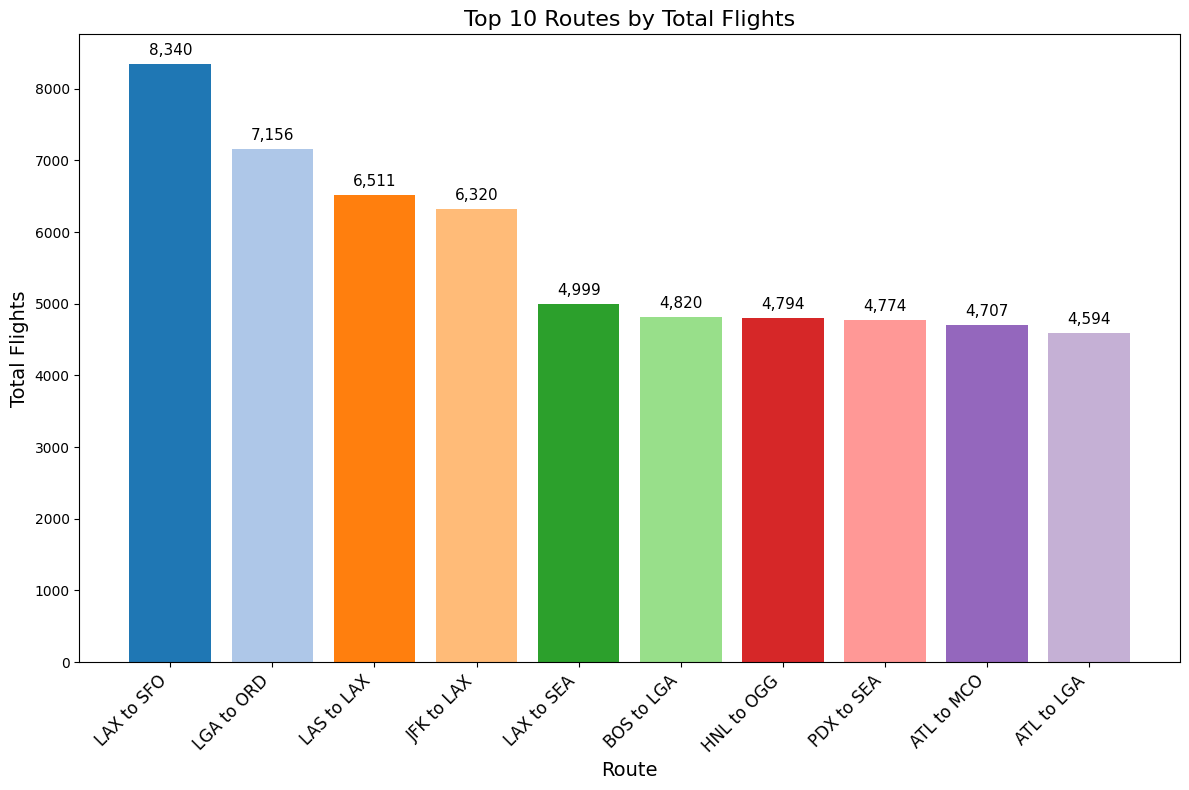

In [171]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Aggregate and pick top 10
top_routes = (
    df
    .groupby('Path2', as_index=False)['Total_Flights']
    .sum()
    .sort_values(by='Total_Flights', ascending=False)
    .head(10)
)

# 2) Choose a color map (you can swap 'tab20' for any other matplotlib cmap)
colors = plt.cm.tab20.colors[:len(top_routes)]

# 3) Plot
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(top_routes['Path2'], top_routes['Total_Flights'], color=colors)

# 4) Annotate bars
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,  # x-position: center of the bar
        height + max(top_routes['Total_Flights']) * 0.01,  # small offset above bar
        f'{int(height):,}',               # format with commas
        ha='center', va='bottom', fontsize=11
    )

# 5) Formatting
ax.set_xticklabels(top_routes['Path2'], rotation=45, ha='right', fontsize=12)
ax.set_xlabel('Route', fontsize=14)
ax.set_ylabel('Total Flights', fontsize=14)
ax.set_title('Top 10 Routes by Total Flights', fontsize=16)
plt.tight_layout()
plt.show()


In [172]:
top_routes.head()

,Path2,Total_Flights
2170,LAX to SFO,8340
2211,LGA to ORD,7156
2075,LAS to LAX,6511
2017,JFK to LAX,6320
2169,LAX to SEA,4999


In [173]:
df.head()

,ORIGIN,DESTINATION,ORIGIN_CITY_NAME,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,AIR_TIME,DISTANCE,OCCUPANCY_RATE,Total_Flights,ORIGIN_STATE_NM,PASSENGERS,fare_median,ITIN_FARE,TYPE_origin,NAME_origin,TYPE_destination,NAME_destination,Path2
0,ABE,ATL,"Allentown/Bethlehem/Easton, PA","Atlanta, GA",1298.0,1185.0,23225.0,150164.0,0.641567,217,Pennsylvania,56.0,495.0,25820,medium_airport,Lehigh Valley International Airport,large_airport,Hartsfield Jackson Atlanta International Airport,ABE to ATL
1,ABQ,ATL,"Albuquerque, NM","Atlanta, GA",511.0,-1208.0,23977.0,209385.0,0.646909,165,New Mexico,62.0,416.5,25501,large_airport,Albuquerque International Sunport,large_airport,Hartsfield Jackson Atlanta International Airport,ABQ to ATL
2,ABY,ATL,"Albany, GA","Atlanta, GA",1700.0,-51.0,9281.0,36105.0,0.649839,249,Georgia,5.0,398.0,1729,medium_airport,Southwest Georgia Regional Airport,large_airport,Hartsfield Jackson Atlanta International Airport,ABY to ATL
3,AEX,ATL,"Alexandria, LA","Atlanta, GA",782.0,-1843.0,23144.0,160000.0,0.641844,320,Louisiana,16.0,399.0,5623,medium_airport,Alexandria International Airport,large_airport,Hartsfield Jackson Atlanta International Airport,AEX to ATL
4,AGS,ATL,"Augusta, GA","Atlanta, GA",5904.0,296.0,23421.0,97669.0,0.653587,683,Georgia,3.0,276.0,723,large_airport,Augusta Regional At Bush Field,large_airport,Hartsfield Jackson Atlanta International Airport,AGS to ATL


In [174]:
# 1 Mileage cost
df['mileage_cost']     = df['DISTANCE'] * (8.00 + 1.18)  # = direct + depr.

# 2) Fixed airport charges (one landing at each airport per round trip)
def airport_fee(t):
    if t == 'medium_airport': return 5000
    if t == 'large_airport' : return 10000
    return 0

df['airport_cost'] = (
    df['TYPE_origin']     .map(airport_fee) +
    df['TYPE_destination'].map(airport_fee)
)* df['Total_Flights']




In [175]:
df.head()

,ORIGIN,DESTINATION,ORIGIN_CITY_NAME,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,AIR_TIME,DISTANCE,OCCUPANCY_RATE,Total_Flights,...,PASSENGERS,fare_median,ITIN_FARE,TYPE_origin,NAME_origin,TYPE_destination,NAME_destination,Path2,mileage_cost,airport_cost
0,ABE,ATL,"Allentown/Bethlehem/Easton, PA","Atlanta, GA",1298.0,1185.0,23225.0,150164.0,0.641567,217,...,56.0,495.0,25820,medium_airport,Lehigh Valley International Airport,large_airport,Hartsfield Jackson Atlanta International Airport,ABE to ATL,1378505.52,3255000
1,ABQ,ATL,"Albuquerque, NM","Atlanta, GA",511.0,-1208.0,23977.0,209385.0,0.646909,165,...,62.0,416.5,25501,large_airport,Albuquerque International Sunport,large_airport,Hartsfield Jackson Atlanta International Airport,ABQ to ATL,1922154.30,3300000
2,ABY,ATL,"Albany, GA","Atlanta, GA",1700.0,-51.0,9281.0,36105.0,0.649839,249,...,5.0,398.0,1729,medium_airport,Southwest Georgia Regional Airport,large_airport,Hartsfield Jackson Atlanta International Airport,ABY to ATL,331443.90,3735000
3,AEX,ATL,"Alexandria, LA","Atlanta, GA",782.0,-1843.0,23144.0,160000.0,0.641844,320,...,16.0,399.0,5623,medium_airport,Alexandria International Airport,large_airport,Hartsfield Jackson Atlanta International Airport,AEX to ATL,1468800.00,4800000
4,AGS,ATL,"Augusta, GA","Atlanta, GA",5904.0,296.0,23421.0,97669.0,0.653587,683,...,3.0,276.0,723,large_airport,Augusta Regional At Bush Field,large_airport,Hartsfield Jackson Atlanta International Airport,AGS to ATL,896601.42,13660000


In [176]:
free_mins = df['Total_Flights'] * 15

# 2) departure delay cost: any minutes beyond free_mins × $75
df['dep_delay_cost'] = ((df['DEP_DELAY'] - free_mins).clip(lower=0)) * 75

# 3) arrival delay cost: same logic for arrivals
df['arr_delay_cost'] = ((df['ARR_DELAY'] - free_mins).clip(lower=0)) * 75

# 4) total delay penalty per route
df['total_delay_cost'] = df['dep_delay_cost'] + df['arr_delay_cost']
df.drop(columns=['dep_delay_cost','arr_delay_cost'], inplace=True)
df['total_cost'] = df['mileage_cost'] + df['airport_cost'] + df['total_delay_cost']

In [177]:
# 4) Baggage‐fee revenue  
#    50% of passengers check 1 bag per leg ⇒ $70 per round trip passenger
df['baggage_revenue'] =  200 * df['OCCUPANCY_RATE'] * 35 * df['Total_Flights']
df['tickets_revenue'] = 200 * df['OCCUPANCY_RATE'] * df['fare_median'] * df['Total_Flights']
df['total_revenue'] = df['baggage_revenue'] + df['tickets_revenue']

In [178]:
df['Profit'] = df['total_revenue'] - df['total_cost']

In [181]:
sort_profit = (
    df[['Path2', 'Profit']]
    .groupby('Path2', as_index=False)
    .sum()
    .sort_values('Profit', ascending=False)
)

### 10 most profitable routes

In [184]:
sort_profit.head(10)

,Path2,Profit
2017,JFK to LAX,1.957689e+08
1129,DCA to ORD,1.615044e+08
130,ATL to CLT,1.423236e+08
1113,DCA to LGA,1.412688e+08
2170,LAX to SFO,1.299452e+08
546,BOS to LGA,1.253214e+08
846,CLT to GSP,1.250285e+08
2211,LGA to ORD,1.215055e+08
139,ATL to DCA,1.176048e+08
2444,MSP to ORD,1.166826e+08


In [ ]:
## Remove the outliers

df.columns

df

In [185]:
df.columns

Index(['ORIGIN', 'DESTINATION', 'ORIGIN_CITY_NAME', 'DEST_CITY_NAME',
       'DEP_DELAY', 'ARR_DELAY', 'AIR_TIME', 'DISTANCE', 'OCCUPANCY_RATE',
       'Total_Flights', 'ORIGIN_STATE_NM', 'PASSENGERS', 'fare_median',
       'ITIN_FARE', 'TYPE_origin', 'NAME_origin', 'TYPE_destination',
       'NAME_destination', 'Path2', 'mileage_cost', 'airport_cost',
       'total_delay_cost', 'total_cost', 'baggage_revenue', 'tickets_revenue',
       'total_revenue', 'Profit'],
      dtype='object')

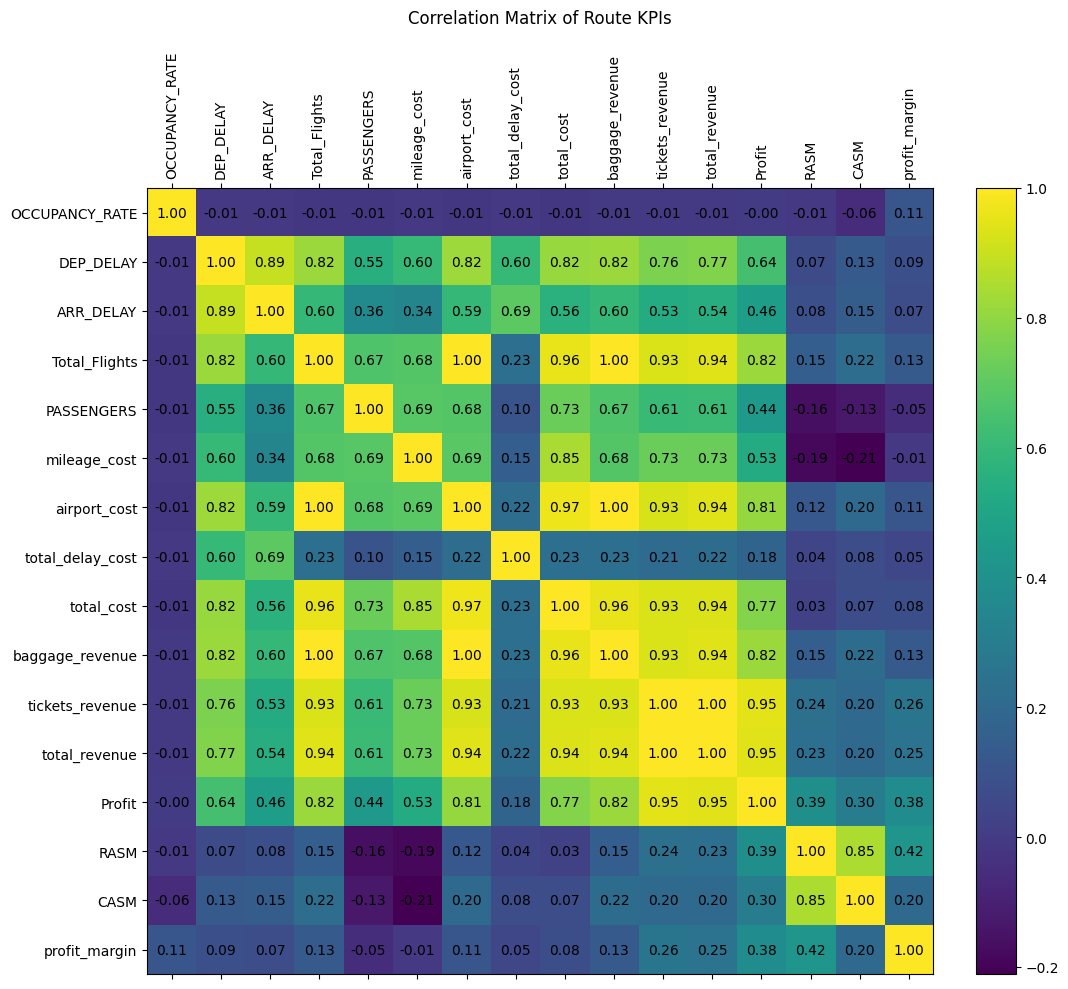

In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ── 1) Derive extra metrics ───────────────────────────────────────────────
df2 = df.copy()

# Available Seat‑Miles = passengers × distance
df2['ASM'] = 200* df2['OCCUPANCY_RATE'] * df2['DISTANCE']

# Revenue/ASM and Cost/ASM
df2['RASM'] = df2['total_revenue'] / df2['ASM']
df2['CASM'] = df2['total_cost']    / df2['ASM']

# Profit margin
df2['profit_margin'] = df2['Profit'] / df2['total_revenue']

# ── 2) Pick the numeric KPIs you want to correlate ────────────────────────
kpi_cols = [
    'OCCUPANCY_RATE',  # load factor
    'DEP_DELAY',       # total or avg dep delay
    'ARR_DELAY',       # total or avg arr delay
    'Total_Flights',
    'PASSENGERS',
    'mileage_cost',
    'airport_cost',
    'total_delay_cost',
    'total_cost',
    'baggage_revenue',
    'tickets_revenue',
    'total_revenue',
    'Profit',
    'RASM',
    'CASM',
    'profit_margin'
]

kpis = df2[kpi_cols]

# ── 3) Compute correlation matrix ─────────────────────────────────────────
corr = kpis.corr()

# ── 4) Plot a heatmap ────────────────────────────────────────────────────
fig, ax = plt.subplots(figsize=(12, 10))
cax = ax.matshow(corr)            # default colormap
fig.colorbar(cax, fraction=0.046, pad=0.04)

# tick labels
ax.set_xticks(np.arange(len(kpi_cols)))
ax.set_yticks(np.arange(len(kpi_cols)))
ax.set_xticklabels(kpi_cols, rotation=90)
ax.set_yticklabels(kpi_cols)

# annotate correlation values
for (i, j), val in np.ndenumerate(corr.values):
    ax.text(j, i, f"{val:.2f}", ha='center', va='center')

plt.title("Correlation Matrix of Route KPIs", pad=20)
plt.tight_layout()
plt.show()


In [ ]:
    """
    KPI's to consider- Occupany Rate
    
    
    
    
    """